In [19]:
#Bumpy Charts in Football Analytics is basically is to show how the ranking of something changed over time

#packages to be imported
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import mplsoccer
from mplsoccer import Bumpy
import highlight_text

from PIL import Image
from io import BytesIO
import requests


In [2]:
#data
df =pd.read_csv('La Liga.csv')

In [3]:
df.head(10)

,Team,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,...,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31,Week 32,Week 33,Week 34
0,Alaves,14,18,19,20,17,19,15,15,15,...,18,19,18,19,20,19,19,18,16,16
1,Athletic Club,16,19,14,15,19,14,16,13,14,...,10,8,11,9,10,11,9,9,10,9
2,Atletico Madrid,4,4,2,5,5,4,3,2,1,...,1,1,1,1,1,1,1,1,1,1
3,Barcelona,1,1,1,1,1,1,5,6,5,...,2,2,2,2,2,3,3,3,3,3
4,Cadiz,18,11,15,10,10,8,7,7,7,...,15,14,14,15,13,12,13,13,13,12
5,Celta Vigo,12,7,8,12,13,17,17,18,18,...,11,9,10,11,8,10,11,11,11,10
6,Eibar,13,14,18,19,14,16,13,16,16,...,16,18,19,18,19,20,20,20,20,20
7,Elche,20,20,20,17,18,13,11,12,12,...,19,17,17,17,17,18,18,16,17,19
8,Getafe,19,12,11,7,11,9,10,9,11,...,13,15,15,14,15,15,15,15,15,15
9,Granada,6,2,6,4,4,3,2,4,6,...,8,10,8,8,9,8,8,8,8,8


In [4]:
#exchanging the rows and columns for simplification and easy to read
df = df.T

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Team,Alaves,Athletic Club,Atletico Madrid,Barcelona,Cadiz,Celta Vigo,Eibar,Elche,Getafe,Granada,Huesca,Levante,Osasuna,Real Betis,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal
Week 1,14,16,4,1,18,12,13,20,19,6,11,15,5,7,3,8,17,2,10,9
Week 2,18,19,4,1,11,7,14,20,12,2,17,15,9,3,5,13,10,8,16,6
Week 3,19,14,2,1,15,8,18,20,11,6,17,10,13,5,3,7,4,9,16,12
Week 4,20,15,5,1,10,12,19,17,7,4,14,13,16,9,2,11,3,6,18,8


In [6]:
#we need Team to be a row 
df.columns=df.iloc[0]
df = df.iloc[1:]

In [7]:
df.head()

Team,Alaves,Athletic Club,Atletico Madrid,Barcelona,Cadiz,Celta Vigo,Eibar,Elche,Getafe,Granada,Huesca,Levante,Osasuna,Real Betis,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal
Week 1,14,16,4,1,18,12,13,20,19,6,11,15,5,7,3,8,17,2,10,9
Week 2,18,19,4,1,11,7,14,20,12,2,17,15,9,3,5,13,10,8,16,6
Week 3,19,14,2,1,15,8,18,20,11,6,17,10,13,5,3,7,4,9,16,12
Week 4,20,15,5,1,10,12,19,17,7,4,14,13,16,9,2,11,3,6,18,8
Week 5,17,19,5,1,10,13,14,18,11,4,15,16,12,6,2,7,3,9,20,8


In [8]:
#list for matchweek
week =['Week' + str(num) for num in range (1,35) ]
week

['Week1',
 'Week2',
 'Week3',
 'Week4',
 'Week5',
 'Week6',
 'Week7',
 'Week8',
 'Week9',
 'Week10',
 'Week11',
 'Week12',
 'Week13',
 'Week14',
 'Week15',
 'Week16',
 'Week17',
 'Week18',
 'Week19',
 'Week20',
 'Week21',
 'Week22',
 'Week23',
 'Week24',
 'Week25',
 'Week26',
 'Week27',
 'Week28',
 'Week29',
 'Week30',
 'Week31',
 'Week32',
 'Week33',
 'Week34']

In [9]:
#we will be covering top 6 teams and study their ranking 
highlight_dict ={
    'Athletico Madrid': '#FF2E2E',
    'Real Madrid' : 'white',
    'Barcelona':'#214ED3',
    'Sevilla':'#C7C7C7',
    'Real Sociedad':'#EDBB00',
    'Real Betis':'#39FF14'
}

In [10]:
#creation of bumpy object allows us to add it to the graph
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

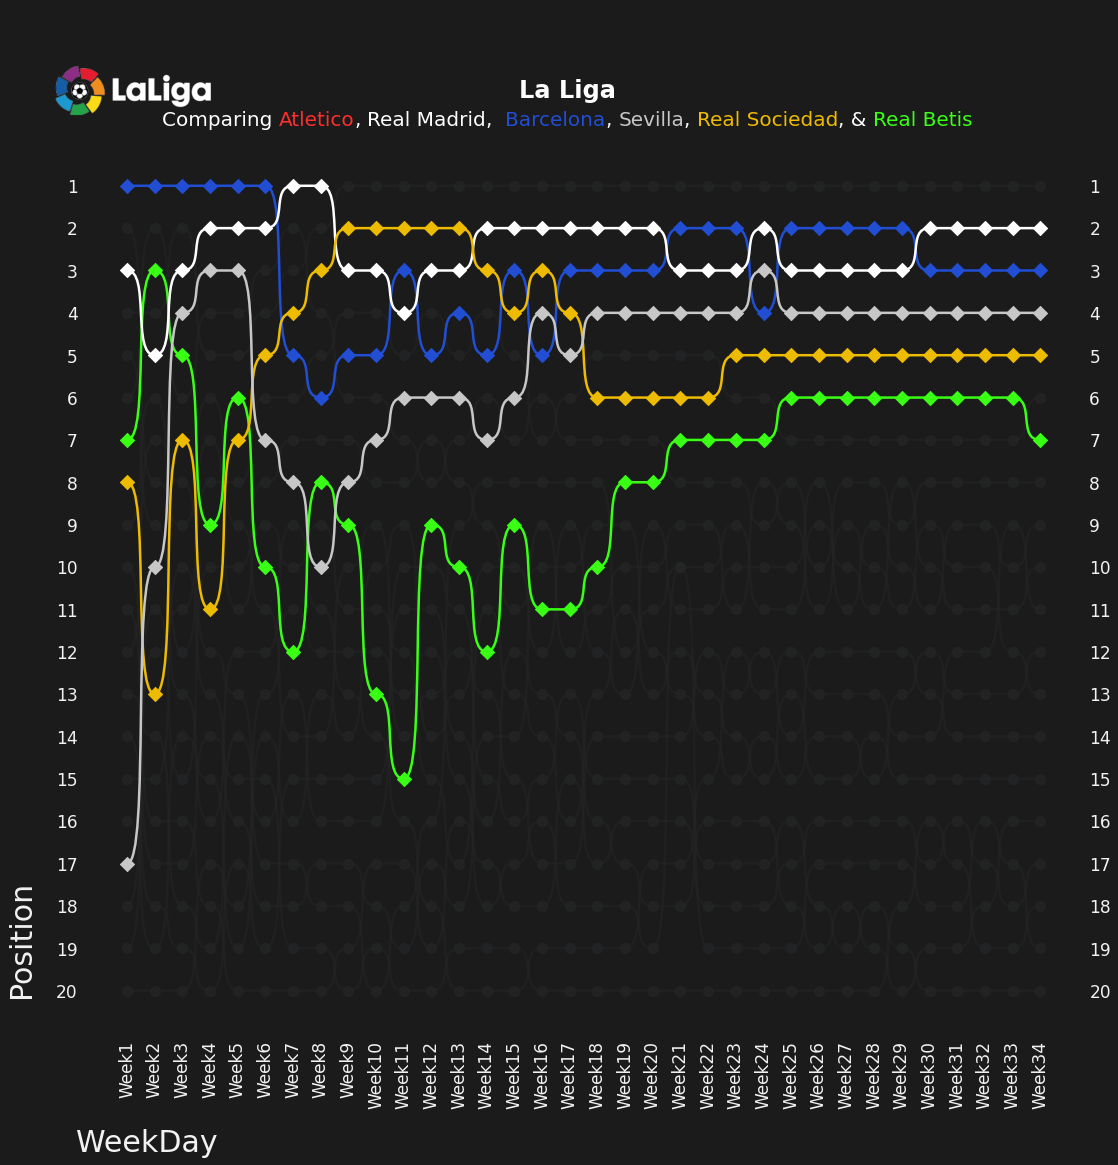

In [21]:
#creation of graph
fig, ax = bumpy.plot(
    x_list=week,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=df,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(18, 18),  # size of the figure
    x_label='WeekDay', y_label='Position',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    )

#texts
fig.text(s = 'La Liga',x = .5, y = .85,
         c = 'white',size=24,weight='bold',ha='center'
        )

highlight_text.fig_text(x=.5, y= .84, 
                       s = 'Comparing <Atletico>, <Real Madrid>,  <Barcelona>, <Sevilla>, <Real Sociedad>, & <Real Betis>',
                       highlight_textprops = [
                           {"color":'#FF2E2E'},
                           {"color":'white'},
                           {"color":'#214ED3'},
                           {"color":'#C7C7C7'},
                           {"color":'#EDBB00'},
                           {"color":'#39FF14'}
                       ],
                        fontsize = 20,
                        color = 'white',
                        ha='center'
                       )

#adding the image logo
ax2 = fig.add_axes([.10,.79,.13,.13])
ax2.axis('off')
img = Image.open('laligalogo.png')
ax2.imshow(img)